# IMPORT LIBRARY

*install Tensorflow*

In [1]:
!pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.1
    Uninstalling typing_extensions-4.14.1:
      Successfully uninstalled typing_extensions-4.14.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.4.1 requires typing-extensions>=4.10.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
openai 1.93.0 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.11.7 requires typing-extensions>=4.12.2, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.33.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
typing-inspection 0.4.1 requires typing-extensions>=4.12.0, but you have typing-extensions 4.5.0 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf


seed = 42 #bobot
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Data Preparation

*Load Dataset*

In [2]:
df = pd.read_csv("Total Konsumsi Perhari.csv",
                          index_col = "Timestamp",
                          parse_dates = ["Timestamp"])
df.head()

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_15244\1774857002.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("Total Konsumsi Perhari.csv",


,Unnamed: 1,Total Energi (KwH)
Timestamp,,
2025-05-18,NaN,"0,7165"
2025-05-19,NaN,"0,3038"
2025-05-20,NaN,"0,4148"
2025-05-21,NaN,"0,4532"
2025-05-22,NaN,"0,373"


*MEnghapus Kolom yang Tidak Digunakan*

In [3]:
df1 = df.drop(columns=['Unnamed: 1'])

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2025-05-18 to 2025-05-27
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Total Energi (KwH)  10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


*Mengecek Missing Value*

In [5]:
mis = df1.isnull().sum()
print(f"Missing Values: \n{mis}")

Missing Values: 
Total Energi (KwH)    0
dtype: int64


**Mengecek Suplikat**

In [6]:
dup = df1.duplicated().sum()
print(f"Duplicates: {dup}")

Duplicates: 0


In [7]:
df1

,Total Energi (KwH)
Timestamp,
2025-05-18,"0,7165"
2025-05-19,"0,3038"
2025-05-20,"0,4148"
2025-05-21,"0,4532"
2025-05-22,"0,373"
2025-05-23,"0,9355"
2025-05-24,"0,7049"
2025-05-25,"1,1491"
2025-05-26,"1,2593"


In [8]:
df1.shape

(10, 1)

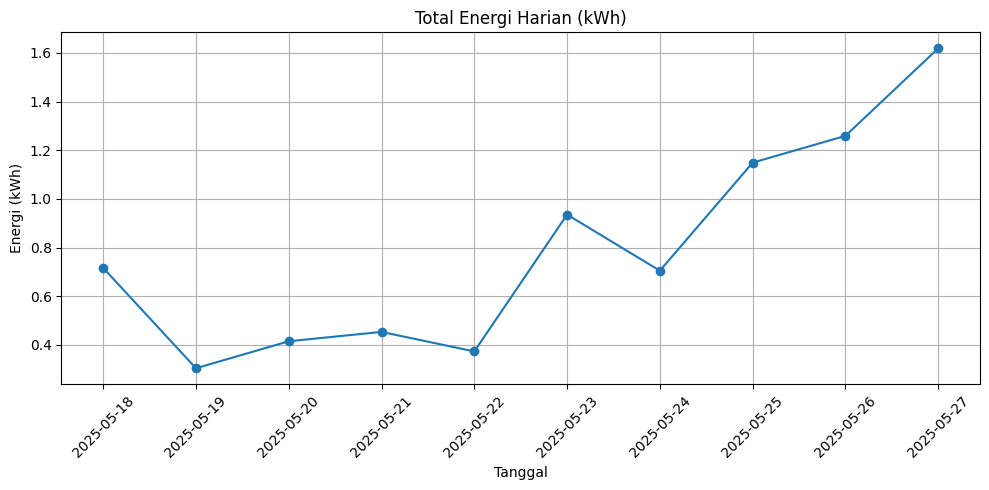

In [9]:
df1['Total Energi (KwH)'] = df1['Total Energi (KwH)'].astype(str).str.replace(',', '.').astype(float)

# Plot langsung
plt.figure(figsize=(10, 5))
# Menggunakan df1 untuk plotting karena kolom 'Unnamed: 1' sudah dihapus
plt.plot(df1.index, df1['Total Energi (KwH)'], marker='o', linestyle='-')
plt.title("Total Energi Harian (kWh)")
plt.xlabel("Tanggal")
plt.ylabel("Energi (kWh)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
Q1 = df1['Total Energi (KwH)'].quantile(0.25)
Q3 = df1['Total Energi (KwH)'].quantile(0.75)
IQR = Q3 - Q1
outlier = df1[(df1['Total Energi (KwH)'] >= Q1 - 1.5*IQR) & (df1['Total Energi (KwH)'] <= Q3 + 1.5*IQR)]
print(outlier)

            Total Energi (KwH)
Timestamp                     
2025-05-18              0.7165
2025-05-19              0.3038
2025-05-20              0.4148
2025-05-21              0.4532
2025-05-22              0.3730
2025-05-23              0.9355
2025-05-24              0.7049
2025-05-25              1.1491
2025-05-26              1.2593
2025-05-27              1.6191


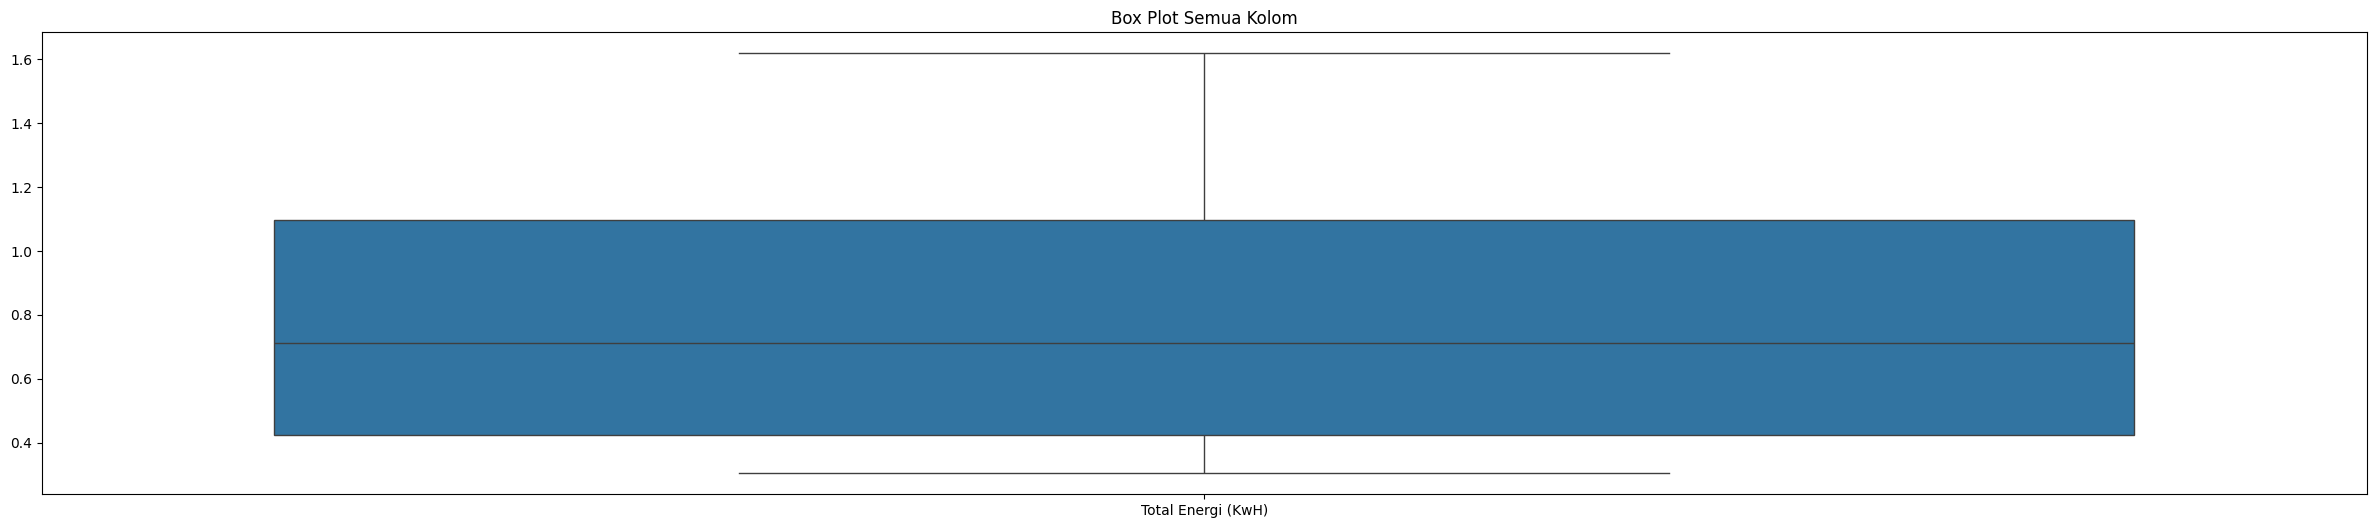

In [11]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df1)
plt.title('Box Plot Semua Kolom')
plt.show()

<Axes: title={'center': 'Cek Time Series'}, xlabel='Timestamp'>

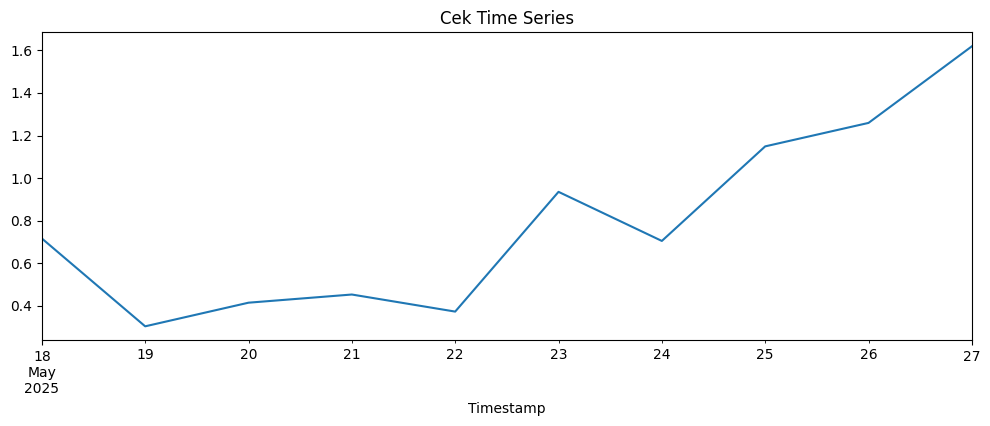

In [12]:
df1['Total Energi (KwH)'].plot(figsize=(12, 4), title="Cek Time Series")

In [13]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1[['Total Energi (KwH)']].values)

In [14]:
print("Jumlah data:", len(df1_scaled))

Jumlah data: 10


In [15]:
df1_scaled

array([[0.31376872],
       [0.        ],
       [0.08439139],
       [0.11358625],
       [0.05261157],
       [0.48027066],
       [0.30494944],
       [0.64266707],
       [0.72645024],
       [1.        ]])

In [16]:
def create_dataset_multistep(data, input_steps=7, output_steps=1):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:i + input_steps])
        y.append(data[i + input_steps:i + input_steps + output_steps])
    return np.array(X), np.array(y)

In [17]:
X, y = create_dataset_multistep(df1_scaled, input_steps=7, output_steps=1)

# Hitung indeks split 80%
split_index = int(len(X) * 0.8)

# Bagi data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Cek bentuk hasil
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n",df1_scaled)
print("==============")
print("\n",X_train)
print("==============")
print("\n",y_train)
print("==============")
print("\n",X_test)
print("==============")
print("\n",y_test)
print('=========')

X_train shape: (2, 7, 1)
X_test shape: (1, 7, 1)
y_train shape: (2, 1, 1)
y_test shape: (1, 1, 1)

 [[0.31376872]
 [0.        ]
 [0.08439139]
 [0.11358625]
 [0.05261157]
 [0.48027066]
 [0.30494944]
 [0.64266707]
 [0.72645024]
 [1.        ]]

 [[[0.31376872]
  [0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]]

 [[0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]]]

 [[[0.64266707]]

 [[0.72645024]]]

 [[[0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]
  [0.72645024]]]

 [[[1.]]]


In [18]:
print("X (Input Sequence):")
print(X)

print("\nY (Target Output):")
print(y)

X (Input Sequence):
[[[0.31376872]
  [0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]]

 [[0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]]

 [[0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]
  [0.72645024]]]

Y (Target Output):
[[[0.64266707]]

 [[0.72645024]]

 [[1.        ]]]


In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense # Ensure Dense is imported

# Define input_steps and output_steps again
input_steps = 7
output_steps = 1

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(input_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(output_steps, activation='relu')) 

model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mape'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 7, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

his= model.fit(X_train, y_train, epochs=150, batch_size=16,
          validation_split=0.1, callbacks=callbacks, shuffle=False)

Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 0.4052 - mae: 0.6366 - mape: 99.0506 - val_loss: 0.4774 - val_mae: 0.6909 - val_mape: 95.1085 - lr: 0.0010
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.3724 - mae: 0.6102 - mape: 94.9520 - val_loss: 0.4389 - val_mae: 0.6625 - val_mape: 91.1986 - lr: 0.0010
Epoch 3/150
1/1 [==============================] - 0s 82ms/step - loss: 0.3419 - mae: 0.5847 - mape: 90.9778 - val_loss: 0.3999 - val_mae: 0.6324 - val_mape: 87.0515 - lr: 0.0010
Epoch 4/150
1/1 [==============================] - 0s 55ms/step - loss: 0.3089 - mae: 0.5558 - mape: 86.4806 - val_loss: 0.3596 - val_mae: 0.5997 - val_mape: 82.5465 - lr: 0.0010
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.2713 - mae: 0.5208 - mape: 81.0425 - val_loss: 0.3172 - val_mae: 0.5632 - val_mape: 77.5238 - lr: 0.0010
Epoch 6/150
1/1 [==============================] - 0s 57ms/step - loss: 0.2323 - mae: 0.4820 - mape: 74.994

In [22]:
df_history = pd.DataFrame(his.history)

# Tampilkan semua kolom (loss, val_loss, dll)
print(df_history)

        loss       mae       mape  val_loss   val_mae   val_mape     lr
0   0.405216  0.636566  99.050636  0.477365  0.690916  95.108536  0.001
1   0.372375  0.610225  94.952034  0.438923  0.662512  91.198586  0.001
2   0.341856  0.584684  90.977814  0.399912  0.632386  87.051544  0.001
3   0.308894  0.555782  86.480583  0.359591  0.599659  82.546494  0.001
4   0.271267  0.520833  81.042465  0.317163  0.563172  77.523819  0.001
5   0.232290  0.481965  74.994438  0.272053  0.521587  71.799355  0.001
6   0.193016  0.439336  68.361374  0.224199  0.473496  65.179420  0.001
7   0.151773  0.389581  60.619419  0.174013  0.417149  57.422890  0.001
8   0.113699  0.337193  52.467697  0.122865  0.350521  48.251244  0.001
9   0.073441  0.271000  42.168037  0.073549  0.271200  37.332207  0.001
10  0.033654  0.183449  28.544983  0.031332  0.177007  24.366035  0.001
11  0.007982  0.089340  13.901485  0.004629  0.068037   9.365651  0.001
12  0.000827  0.028755   4.474380  0.001795  0.042363   5.831440

<module 'matplotlib.pyplot' from 'c:\\Users\\My ASUS\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

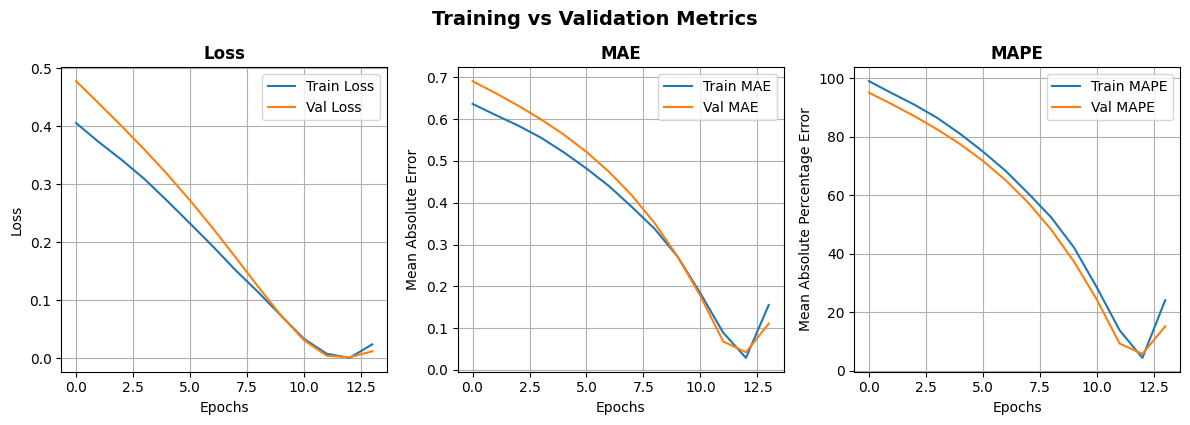

In [23]:

# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Val Loss')
plt.title('Loss', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(his.history['mae'], label='Train MAE')
plt.plot(his.history['val_mae'], label='Val MAE')
plt.title('MAE', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

# Plot MAPE
plt.subplot(1, 3, 3)
plt.plot(his.history['mape'], label='Train MAPE')
plt.plot(his.history['val_mape'], label='Val MAPE')
plt.title('MAPE', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Training vs Validation Metrics', fontweight='bold', y=1.05, fontsize=14)
plt


In [24]:
print(X_test) #input data skala 0-1
print("==============")
print(y_test)
print("==============")
print(X_train)
print("==============")
print(y_train)

[[[0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]
  [0.72645024]]]
[[[1.]]]
[[[0.31376872]
  [0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]]

 [[0.        ]
  [0.08439139]
  [0.11358625]
  [0.05261157]
  [0.48027066]
  [0.30494944]
  [0.64266707]]]
[[[0.64266707]]

 [[0.72645024]]]


In [25]:
loss, mae, mape = model.evaluate(X_test, y_test)
print(f"Loss (MAE): {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - mae: 0.0612 - mape: 6.1181
Loss (MAE): 0.0037
MAE: 0.0612
MAPE: 6.12%


In [26]:
y_pred_scaled = model.predict(X_test,)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 [==============================] - 1s 692ms/step


In [27]:
print(" hasil prediksi model skala 0-1 : ",y_pred_scaled) 
print("==============")
print("hasil akhir prediksi tanggal 27 skala asli: ",y_pred, "kwh") #
print("==============")
print("Label skala 0-1 : ",y_test) # 
print("==============")
print("label asli skala asli tanggal 27 :",y_test_rescaled,"kwh") #

 hasil prediksi model skala 0-1 :  [[0.9388187]]
hasil akhir prediksi tanggal 27 skala asli:  [[1.5386282]] kwh
Label skala 0-1 :  [[[1.]]]
label asli skala asli tanggal 27 : [[1.6191]] kwh


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import necessary metrics

y_pred_eval = y_pred[:len(y_test_rescaled)].flatten()
y_test_eval = y_test_rescaled.flatten()

# Evaluasi metrik
mse = mean_squared_error(y_test_eval, y_pred_eval)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_eval, y_pred_eval)
mape = np.mean(np.abs((y_test_eval - y_pred_eval) / y_test_eval)) * 100

# Output
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}") #sudah jadi kwh
print(f"MAPE : {mape:.3f}%")

MSE  : 0.0065
RMSE : 0.0805
MAE  : 0.0805
MAPE : 4.970%


In [29]:
mean_actual = np.mean(y_test_eval)

mse_percent = (mse / (mean_actual ** 2)) * 100  # MSE relatif kuadrat
rmse_percent = (rmse / mean_actual) * 100       # RMSE relatif
mae_percent = (mae / mean_actual) * 100         # MAE relatif

print(f"MSE (relatif kuadrat) : {mse_percent:.2f}%")
print(f"RMSE (relatif)         : {rmse_percent:.2f}%")
print(f"MAE (relatif)          : {mae_percent:.2f}%")

MSE (relatif kuadrat) : 0.25%
RMSE (relatif)         : 4.97%
MAE (relatif)          : 4.97%


In [30]:
W, U, b = model.layers[0].get_weights()
print("W shape:", W.shape)
print("U shape:", U.shape)
print("b shape:", b.shape)

W shape: (1, 512)
U shape: (128, 512)
b shape: (512,)


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Ambil bobot dari layer pertama LSTM di model Sequential
weights_lstm = model.layers[0].get_weights()

# Buat ulang layer dengan return_state=True
input_seq = Input(shape=(input_steps, 1))
lstm_out, h_t, c_t = LSTM(128, return_state=True, return_sequences=True)(input_seq)
lstm_state_model = Model(inputs=input_seq, outputs=[lstm_out, h_t, c_t])

# Set ulang bobotnya
lstm_state_model.layers[1].set_weights(weights_lstm)

# Ambil data sample
X_sample = X_test[0].reshape(1, input_steps, 1)

# Prediksi
_, h_val, c_val = lstm_state_model.predict(X_sample)

# Ambil x_t (input terakhir)
x_t = X_sample[0, -1, 0]

# Tampilkan
print("x_t:", x_t)
print("h_t[:5]:", h_val[0][:5])
print("c_t[:5]:", c_val[0][:5])


1/1 [==============================] - 0s 343ms/step
x_t: 0.72645023948909
h_t[:5]: [ 0.05422464 -0.10294801  0.01003461  0.04247887 -0.02616585]
c_t[:5]: [ 0.1047576  -0.19985153  0.02079174  0.08521694 -0.05156074]


In [32]:
# Ambil bobot dari layer LSTM pertama
W, U, b = model.layers[0].get_weights()

# Tampilkan bentuk matriks
print("W (kernel input):", W.shape)
print("U (recurrent kernel):", U.shape)
print("b (bias):", b.shape)

# Pisahkan ke dalam gate-gate LSTM
# Urutan: [forget, input, cell, output]
W_i, W_f, W_c, W_o = np.hsplit(W, 4)
U_i, U_f, U_c, U_o = np.hsplit(U, 4)
b_i, b_f, b_c, b_o = np.split(b, 4)

# Contoh: tampilkan 5 bobot pertama dari masing-masing gate
print("\n=== GATE VALUES (Contoh 5 pertama) ===")
print("W_f (Forget Gate):", W_f[:5].flatten())
print("W_i (Input Gate):", W_i[:5].flatten())
print("W_c (Cell Candidate):", W_c[:5].flatten())
print("W_o (Output Gate):", W_o[:5].flatten())

print("\n=== U (Recurrent Kernel) ===")
print("U_i (Input Gate):", U_i[:5].flatten())
print("U_f (Forget Gate):", U_f[:5].flatten())
print("U_c (Cell Candidate):", U_c[:5].flatten())
print("U_o (Output Gate):", U_o[:5].flatten())

print("\n=== b (Bias) ===")
print("b_i (Input Gate):", b_i[:5])
print("b_f (Forget Gate):", b_f[:5])
print("b_c (Cell Candidate):", b_c[:5])
print("b_o (Output Gate):", b_o[:5])


W (kernel input): (1, 512)
U (recurrent kernel): (128, 512)
b (bias): (512,)

=== GATE VALUES (Contoh 5 pertama) ===
W_f (Forget Gate): [ 0.03598206 -0.05723406  0.05258248 -0.03803371  0.01884423  0.02188128
 -0.04882289 -0.08652134  0.01563224  0.03153525  0.08904961 -0.05717945
 -0.07812543 -0.05900533  0.02149391  0.08065312  0.06546712  0.01264219
  0.01705774  0.09898132 -0.02722571 -0.01651814  0.03188656  0.10839767
 -0.088327   -0.01754853 -0.04092906 -0.09720947  0.08007715 -0.04548553
  0.07477031  0.08539558  0.00855823  0.02463434 -0.08990313  0.09154357
  0.115663   -0.08661798  0.08811122 -0.00567921  0.07771637 -0.05332799
 -0.05381313  0.01846984 -0.00635931 -0.00486144 -0.0418119   0.0894134
  0.00985129 -0.04970553  0.07006812 -0.10852426 -0.00919962  0.10965667
 -0.09273519 -0.07482458 -0.05030947 -0.01084541  0.00992765 -0.06944738
 -0.02862197 -0.03951736  0.00522424 -0.09642743 -0.0023097   0.05928088
  0.10689885  0.07753522 -0.02932685  0.00834976  0.0713013   

In [33]:
import numpy as np

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Input dan state
x_t = 0.72645023948909
h_prev = np.array([0.00688855, -0.04407472, 0.02513788, 0.00519975, -0.021763])
c_prev = np.array([0.01370939, -0.08778429, 0.05123552, 0.01067972, -0.04256762])

# Bobot dari layer pertama
W_f = np.array([ 0.03598206, -0.05723406,  0.05258248, -0.03803371,  0.01884423])
W_i = np.array([ 0.08781231,  0.04797729, -0.03765092,  0.10986136, -0.09444812])
W_c = np.array([ 0.03283611, -0.10202529,  0.04151412,  0.04167251, -0.04876078])
W_o = np.array([ 0.03082721,  0.02633382, -0.04716971, -0.05696914,  0.06019082])

U_f = np.array([ 0.01415535, -0.04600785,  0.02239358, -0.06134197,  0.08105779])
U_i = np.array([ 0.0055421 ,  0.07911509,  0.00295918, -0.0322841 ,  0.05465254])
U_c = np.array([ 0.09632549,  0.01824995,  0.04447084, -0.00443890, -0.01862760])
U_o = np.array([-0.09183166, -0.01786839,  0.10994762,  0.01726660,  0.0115415 ])

b_f = np.array([1.0104688 , 1.0128739 , 0.99298096, 1.012337  , 0.99723095])
b_i = np.array([ 0.01042967,  0.01289706, -0.00778563,  0.0124703 , -0.0030011 ])
b_c = np.array([ 0.00995293, -0.01284932, -0.00359616,  0.01283877, -0.00182139])
b_o = np.array([ 0.01043876,  0.01289732, -0.0077913 ,  0.01247987, -0.00296662])

# Step 1: Forget gate
f_t = sigmoid(x_t * W_f + h_prev * U_f + b_f)

# Step 2: Input gate
i_t = sigmoid(x_t * W_i + h_prev * U_i + b_i)

# Step 3: Candidate cell
C_tilda = tanh(x_t * W_c + h_prev * U_c + b_c)

# Step 4: Cell state
c_t = f_t * c_prev + i_t * C_tilda

# Step 5: Output gate
o_t = sigmoid(x_t * W_o + h_prev * U_o + b_o)

# Step 6: Hidden state
h_t = o_t * tanh(c_t)

# Cetak hasil
np.set_printoptions(precision=5, suppress=True)
print("Forget Gate f_t:", f_t)
print("Input Gate i_t:", i_t)
print("Cell Candidate C~_t:", C_tilda)
print("Cell State c_t:", c_t)
print("Output Gate o_t:", o_t)
print("Hidden State h_t:", h_t)


Forget Gate f_t: [0.73821 0.72578 0.73725 0.72798 0.73286]
Input Gate i_t: [0.51856 0.51106 0.49124 0.52301 0.48181]
Cell Candidate C~_t: [ 0.03446 -0.08755  0.02767  0.04306 -0.03682]
Cell State c_t: [ 0.02799 -0.10845  0.05137  0.0303  -0.04894]
Output Gate o_t: [0.50805 0.5082  0.49018 0.4928  0.51013]
Hidden State h_t: [ 0.01422 -0.0549   0.02516  0.01493 -0.02494]


In [34]:
periods = 7
input_steps = 7
forecast_batch = df1_scaled[-input_steps:].reshape(1, input_steps, 1)

predictions = []
for _ in range(periods):
    pred = model.predict(forecast_batch)[0]
    predictions.append(pred)
    forecast_batch = np.append(forecast_batch[:, 1:, :], [[pred]], axis=1)

predictions = scaler.inverse_transform(predictions)
predictions = np.array(predictions)
# Ambil tanggal terakhir dari data asli
last_date = df1.index.max()
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=periods, freq='D')

# Buat DataFrame prediksi
df_pred = pd.DataFrame(predictions.flatten(), index=future_index, columns=['Total Energi (KwH)'])

# Gabungkan ke DataFrame asli
df_all = pd.concat([df1, df_pred])




1/1 [==============================] - 0s 16ms/step


In [35]:
df_pred

,Total Energi (KwH)
2025-05-28,1.797548
2025-05-29,2.134941
2025-05-30,2.628866
2025-05-31,2.955942
2025-06-01,3.507211
2025-06-02,3.958276
2025-06-03,4.448224


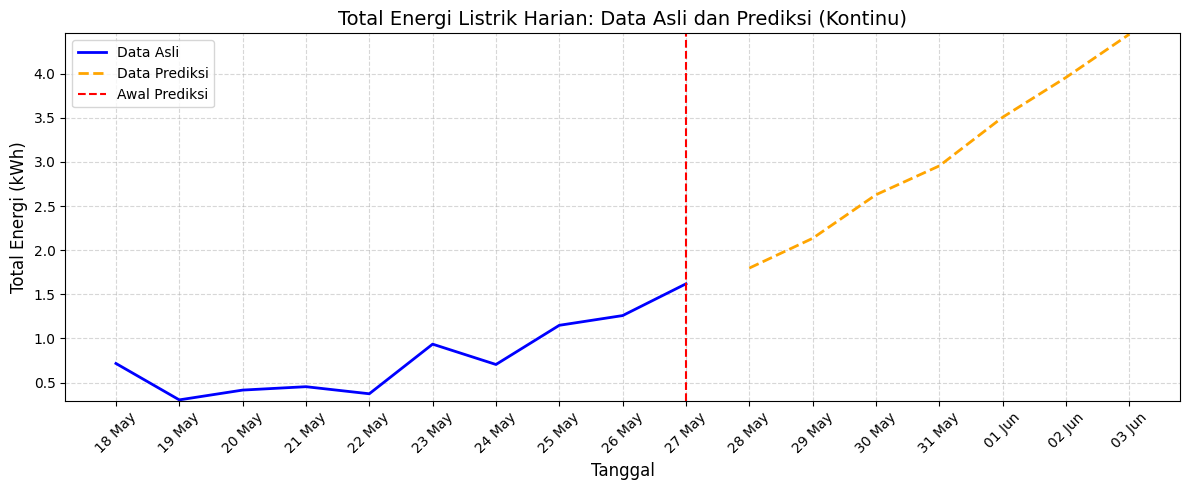

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

plt.figure(figsize=(12, 5))

# Plot data asli
plt.plot(df1.index, df1['Total Energi (KwH)'], label='Data Asli', color='blue', linewidth=2)

# Plot data prediksi mulai dari last_date
plt.plot(df_pred.index, df_pred['Total Energi (KwH)'], label='Data Prediksi', color='orange', linestyle='--', linewidth=2)

# Garis vertikal: titik awal prediksi
plt.axvline(x=last_date, color='red', linestyle='--', label='Awal Prediksi')

# Judul dan label
plt.title("Total Energi Listrik Harian: Data Asli dan Prediksi (Kontinu)", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Total Energi (kWh)", fontsize=12)

# Format tanggal sumbu X agar jelas
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.xticks(rotation=45)

# Sumbu Y otomatis, tapi bisa ditambah step jika perlu
y_min = min(df1['Total Energi (KwH)'].min(), df_pred['Total Energi (KwH)'].min())
y_max = max(df1['Total Energi (KwH)'].max(), df_pred['Total Energi (KwH)'].max())
plt.ylim(y_min - 0.01, y_max + 0.01)

# Tambahkan grid dan legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


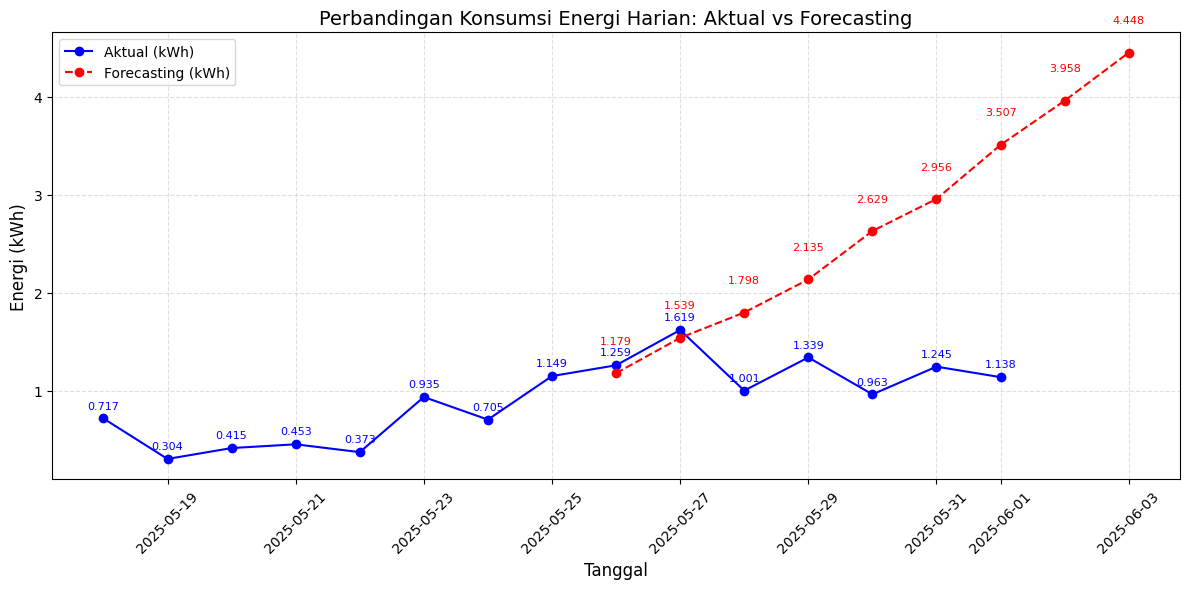

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Data awal
data = {
    "TimeStamp": [
        "2025-05-18", "2025-05-19", "2025-05-20", "2025-05-21", "2025-05-22", "2025-05-23",
        "2025-05-24", "2025-05-25", "2025-05-26", "2025-05-27", "2025-05-28", "2025-05-29",
        "2025-05-30", "2025-05-31", "2025-06-01", "2025-06-02", "2025-06-03"
    ],
    "Aktual (KwH)": [
        0.716500, 0.303800, 0.414800, 0.453200, 0.373000, 0.935500,
        0.704900, 1.149100, 1.259300, 1.619100, 1.0009, 1.3394,
        0.9627, 1.245, 1.1381, None, None
    ],
    "Forecasting (KwH)": [
        None, None, None, None, None, None,
        None, None, 1.1788, 1.538628, 1.797548, 2.134941,
        2.628866, 2.955942, 3.507211, 3.958276, 4.448224
    ]
}

# Membuat DataFrame
df = pd.DataFrame(data)
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])

# Membuat rentang tanggal lengkap
full_dates = pd.date_range(start=df["TimeStamp"].min(), end=df["TimeStamp"].max())

# Reindex agar tanggal lengkap
df = df.set_index("TimeStamp").reindex(full_dates).rename_axis("TimeStamp").reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["TimeStamp"], df["Aktual (KwH)"], marker='o', color='blue', label="Aktual (kWh)")
plt.plot(df["TimeStamp"], df["Forecasting (KwH)"], marker='o', linestyle='--', color='red', label="Forecasting (kWh)")

# Tambahkan label nilai untuk Aktual (biru)
for x, y in zip(df["TimeStamp"], df["Aktual (KwH)"]):
    if pd.notna(y):
        plt.text(x, y + 0.1, f"{y:.3f}", ha='center', fontsize=8, color='blue')

# Tambahkan label nilai untuk Forecasting (merah)
for x, y in zip(df["TimeStamp"], df["Forecasting (KwH)"]):
    if pd.notna(y):
        plt.text(x, y + 0.3, f"{y:.3f}", ha='center', fontsize=8, color='red')

plt.title("Perbandingan Konsumsi Energi Harian: Aktual vs Forecasting", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Energi (kWh)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [48]:
df_pred

,Total Energi (KwH)
2025-05-28,1.797548
2025-05-29,2.134941
2025-05-30,2.628866
2025-05-31,2.955942
2025-06-01,3.507211
2025-06-02,3.958276
2025-06-03,4.448224


In [49]:
df_all

,Total Energi (KwH)
2025-05-18,0.716500
2025-05-19,0.303800
2025-05-20,0.414800
2025-05-21,0.453200
2025-05-22,0.373000
2025-05-23,0.935500
2025-05-24,0.704900
2025-05-25,1.149100
2025-05-26,1.259300
2025-05-27,1.619100


In [ ]:
import requests
import json
import time

# Konfigurasi ThingsBoard
THINGSBOARD_TOKEN = "3be1j1yjR4WBka29eAsH"
THINGSBOARD_URL = f"http://demo.thingsboard.io/api/v1/{THINGSBOARD_TOKEN}/telemetry"
HEADERS = {'Content-Type': 'application/json'}

# Loop tak terbatas
while True:
    for date, value in df_pred['Total Energi (KwH)'].items():
        payload = {
            "predicted_energy": float(round(value, 4)),  # konversi ke float
            "prediction_date": str(date.date())          # format tanggal
        }

        try:
            response = requests.post(THINGSBOARD_URL, data=json.dumps(payload), headers=HEADERS)
            print(f"{date.date()} : {value:.4f} kWh | Status: {response.status_code}")
        except Exception as e:
            print(f"Gagal mengirim data: {e}")

        time.sleep(5)  # jeda antar pengiriman (1 detik untuk simulasi cepat)


2025-05-28 : 1.7975 kWh | Status: 200
2025-05-29 : 2.1349 kWh | Status: 200
2025-05-30 : 2.6289 kWh | Status: 200
2025-05-31 : 2.9559 kWh | Status: 200
2025-06-01 : 3.5072 kWh | Status: 200
2025-06-02 : 3.9583 kWh | Status: 200
2025-06-03 : 4.4482 kWh | Status: 200
2025-05-28 : 1.7975 kWh | Status: 200
2025-05-29 : 2.1349 kWh | Status: 200
2025-05-30 : 2.6289 kWh | Status: 200
2025-05-31 : 2.9559 kWh | Status: 200
2025-06-01 : 3.5072 kWh | Status: 200
2025-06-02 : 3.9583 kWh | Status: 200
2025-06-03 : 4.4482 kWh | Status: 200
2025-05-28 : 1.7975 kWh | Status: 200
2025-05-29 : 2.1349 kWh | Status: 200
2025-05-30 : 2.6289 kWh | Status: 200
2025-05-31 : 2.9559 kWh | Status: 200
2025-06-01 : 3.5072 kWh | Status: 200
2025-06-02 : 3.9583 kWh | Status: 200
2025-06-03 : 4.4482 kWh | Status: 200
2025-05-28 : 1.7975 kWh | Status: 200
2025-05-29 : 2.1349 kWh | Status: 200
2025-05-30 : 2.6289 kWh | Status: 200
2025-05-31 : 2.9559 kWh | Status: 200
2025-06-01 : 3.5072 kWh | Status: 200
2025-06-02 :

In [50]:
# Misal model kamu sudah dibuat dan dilatih
model.save('model_lstm.h5')


c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
import tensorflow as tf

# Muat model
model = tf.keras.models.load_model("model_lstm.h5")

# Siapkan converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Tambahkan opsi opset
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Default ops
    tf.lite.OpsSet.SELECT_TF_OPS     # Tambahan ops TF yang tidak standar
]

# Nonaktifkan transformasi tensor list
converter._experimental_lower_tensor_list_ops = False

# Konversi model
tflite_model = converter.convert()

# Simpan ke file
with open("model_energy.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\MYASUS~1\AppData\Local\Temp\tmpjcqmn9eu\assets


INFO:tensorflow:Assets written to: C:\Users\MYASUS~1\AppData\Local\Temp\tmpjcqmn9eu\assets
